## Obesity prediction Model

1. Problem
2. Data
3. Evaluation
4. Metrics

## 1. Problem
`Create a model to identify probability of a person developing obesity and underlying conditions`

## 2. Data 
Data was downloaded from Kaggle's Multi-Class Prediction of Obesity Competition - https://www.kaggle.com/competitions/playground-series-s4e2/data

## 3. Evaluation
Submissions are evaluated using the `accuracy score`.

## Metrics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('train.csv')
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## We can see that our dataset doesn't have missing values which makes our work way easier

In [5]:
# Let's create a copy of our dataset 
df_tmp = df.copy()
df_tmp.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.CAEC.value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [7]:
df.CALC.value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

## Let's turn Categorical values into numberical

In [8]:
encoding = {
    'Sometimes': 0.5,
    'Frequently': 0.80,
    'Always': 1.0,
    'no': 0
}

df_tmp['CAEC'] = df_tmp['CAEC'].replace(encoding)
df_tmp['CALC'] = df_tmp['CALC'].replace(encoding)
df_tmp

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,0.5,no,2.763573,no,0.000000,0.976473,0.5,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,0.8,no,2.000000,no,1.000000,1.000000,0.0,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,0.5,no,1.910378,no,0.866045,1.673584,0.0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,0.5,no,1.674061,no,1.467863,0.780199,0.5,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,0.5,no,1.979848,no,1.967973,0.931721,0.5,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,0.5,no,2.151809,no,1.330519,0.196680,0.5,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,0.8,no,1.000000,no,2.000000,1.000000,0.5,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,0.5,no,2.000000,no,1.158040,1.198439,0.0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,0.5,no,2.144838,no,0.000000,0.973834,0.0,Automobile,Overweight_Level_II


In [9]:
df_tmp.CALC.value_counts()

CALC
0.5    15066
0.0     5163
0.8      529
Name: count, dtype: int64

In [10]:
df_tmp.CAEC.value_counts()

CAEC
0.5    17529
0.8     2472
1.0      478
0.0      279
Name: count, dtype: int64

## Encoding `yes` and `no` categories

In [11]:
yes_no_encoding = {
    'yes' : 1,
    'no' : 0
}
# Apply the encoding to the specified columns
df_tmp['family_history_with_overweight'] = df_tmp['family_history_with_overweight'].replace(yes_no_encoding)
df_tmp['FAVC'] = df_tmp['FAVC'].replace(yes_no_encoding)
df_tmp['SMOKE'] = df_tmp['SMOKE'].replace(yes_no_encoding)
df_tmp['SCC'] = df_tmp['SCC'].replace(yes_no_encoding)

df_tmp

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0.5,0,2.763573,0,0.000000,0.976473,0.5,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0.8,0,2.000000,0,1.000000,1.000000,0.0,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0.5,0,1.910378,0,0.866045,1.673584,0.0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0.5,0,1.674061,0,1.467863,0.780199,0.5,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0.5,0,1.979848,0,1.967973,0.931721,0.5,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,0.5,0,2.151809,0,1.330519,0.196680,0.5,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,0.8,0,1.000000,0,2.000000,1.000000,0.5,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,0.5,0,2.000000,0,1.158040,1.198439,0.0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,0.5,0,2.144838,0,0.000000,0.973834,0.0,Automobile,Overweight_Level_II


In [12]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  float64
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [13]:
df_tmp.Gender

0          Male
1        Female
2        Female
3        Female
4          Male
          ...  
20753      Male
20754      Male
20755      Male
20756      Male
20757      Male
Name: Gender, Length: 20758, dtype: object

## Let's visualize 

In [14]:
df_tmp.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

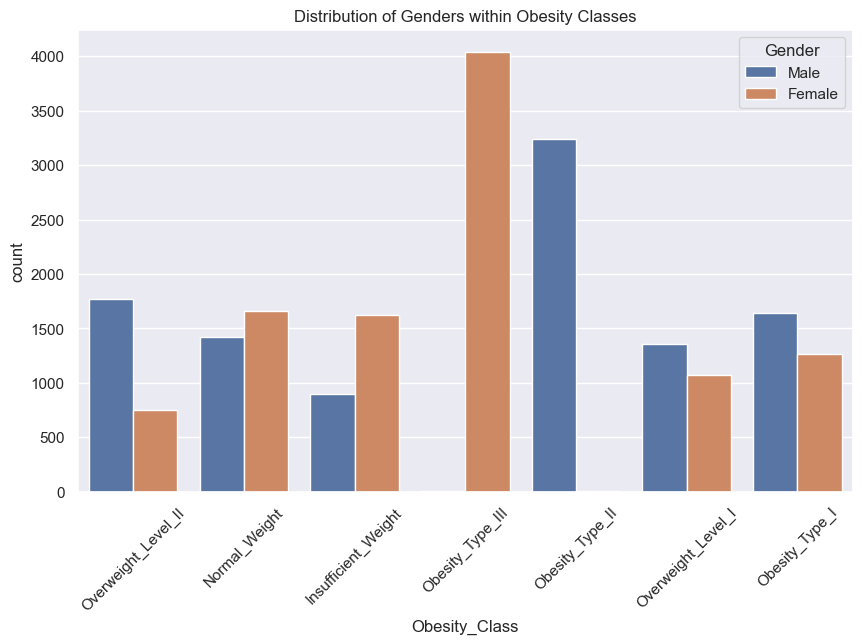

In [15]:
data = {
    'Gender': df_tmp.Gender,
    'Obesity_Class': df_tmp.NObeyesdad
}
gndr = pd.DataFrame(data)

# Create a countplot with Gender and Obesity_Class
plt.figure(figsize=(10, 6))
sns.countplot(data=gndr, x='Obesity_Class', hue='Gender')
plt.title('Distribution of Genders within Obesity Classes')
plt.xticks(rotation=45)
plt.show();

In [16]:
df_tmp.MTRANS.value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [17]:
MTRANS_encoding = {
    'Public_Transportation' : 0.9,
    'Automobile' : 1,
    'Walking' : 0.1,
    'Motorbike' : 0.6,
    'Bike' : 0.3
}
df_tmp['MTRANS'] = df_tmp['MTRANS'].replace(MTRANS_encoding)
df_tmp

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0.5,0,2.763573,0,0.000000,0.976473,0.5,0.9,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0.8,0,2.000000,0,1.000000,1.000000,0.0,1.0,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0.5,0,1.910378,0,0.866045,1.673584,0.0,0.9,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0.5,0,1.674061,0,1.467863,0.780199,0.5,0.9,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0.5,0,1.979848,0,1.967973,0.931721,0.5,0.9,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,0.5,0,2.151809,0,1.330519,0.196680,0.5,0.9,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,0.8,0,1.000000,0,2.000000,1.000000,0.5,0.9,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,0.5,0,2.000000,0,1.158040,1.198439,0.0,0.9,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,0.5,0,2.144838,0,0.000000,0.973834,0.0,1.0,Overweight_Level_II


In [18]:
gender_encoding = {
    'Male' : 0,
    'Female' : 1
}

df_tmp['Gender'] = df_tmp['Gender'].replace(gender_encoding)
df_tmp

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0.5,0,2.763573,0,0.000000,0.976473,0.5,0.9,Overweight_Level_II
1,1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0.8,0,2.000000,0,1.000000,1.000000,0.0,1.0,Normal_Weight
2,2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0.5,0,1.910378,0,0.866045,1.673584,0.0,0.9,Insufficient_Weight
3,3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0.5,0,1.674061,0,1.467863,0.780199,0.5,0.9,Obesity_Type_III
4,4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0.5,0,1.979848,0,1.967973,0.931721,0.5,0.9,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,0,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,0.5,0,2.151809,0,1.330519,0.196680,0.5,0.9,Obesity_Type_II
20754,20754,0,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,0.8,0,1.000000,0,2.000000,1.000000,0.5,0.9,Insufficient_Weight
20755,20755,0,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,0.5,0,2.000000,0,1.158040,1.198439,0.0,0.9,Obesity_Type_II
20756,20756,0,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,0.5,0,2.144838,0,0.000000,0.973834,0.0,1.0,Overweight_Level_II


In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  float64
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [20]:
df_tmp.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

## Encoding our Target values

In [21]:
obesity_encoding = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

df_tmp['NObeyesdad'] = df_tmp['NObeyesdad'].map(obesity_encoding)
df_tmp

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0.5,0,2.763573,0,0.000000,0.976473,0.5,0.9,3
1,1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0.8,0,2.000000,0,1.000000,1.000000,0.0,1.0,1
2,2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0.5,0,1.910378,0,0.866045,1.673584,0.0,0.9,0
3,3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0.5,0,1.674061,0,1.467863,0.780199,0.5,0.9,6
4,4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0.5,0,1.979848,0,1.967973,0.931721,0.5,0.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,0,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,0.5,0,2.151809,0,1.330519,0.196680,0.5,0.9,5
20754,20754,0,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,0.8,0,1.000000,0,2.000000,1.000000,0.5,0.9,0
20755,20755,0,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,0.5,0,2.000000,0,1.158040,1.198439,0.0,0.9,5
20756,20756,0,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,0.5,0,2.144838,0,0.000000,0.973834,0.0,1.0,3


In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  float64
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

## Splitting our dataset into train/test data

In [23]:
X = df_tmp.drop('NObeyesdad', axis=1)
y = df_tmp['NObeyesdad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16606, 17), (4152, 17), (16606,), (4152,))

In [25]:
models = {'GradientBoostingClassifier': GradientBoostingClassifier(),
          'Random Forest': RandomForestClassifier()
         }

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

score1 = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
score1

{'GradientBoostingClassifier': 0.9051059730250481,
 'Random Forest': 0.8921001926782274}

In [26]:
GBC = GradientBoostingClassifier()

GBC.fit(X_train, y_train)

GBC_score = GBC.score(X_test, y_test)
GBC_score

0.9051059730250481

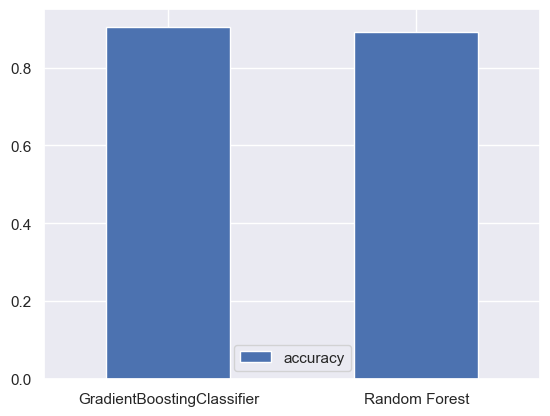

In [27]:
model_compare = pd.DataFrame(score1, index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

We can see that `GradientBoostingClassifier` performs slightly better than `RandomForestClassifier`

## Using OVR classifier to imporove accuracy

In [29]:
OVR_rf = OneVsRestClassifier(RandomForestClassifier())

# Fit the model to our train data
OVR_rf.fit(X_train, y_train)

# Score the model
OVR_rf_score = OVR_rf.score(X_test, y_test)
OVR_rf_score

0.9005298651252408

In [30]:
OVR_GBC = OneVsRestClassifier(GradientBoostingClassifier())

# Fitting the model
OVR_GBC.fit(X_train, y_train)

# Score the model
OVR_GBC_score = OVR_GBC.score(X_test, y_test)
OVR_GBC_score

0.9022157996146436

### After reviewing the results I've decided to use `RandomizedSearchCV` on RandomForestClassifier first as it shows better results so far.

In [ ]:
rf = RandomForestClassifier()

# Define OneVsRestClassifier with RandomForest
ovr = OneVsRestClassifier(rf)

# Hyperparameters to tune
param_distributions = {
    'estimator__n_estimators': [100, 200, 300],  # Note the 'estimator__' prefix
    'estimator__max_depth': [None, 10, 20, 30]
    # Add other hyperparameters with the 'estimator__' prefix
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ovr,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Score the model
random_search_score = random_search.score(X_test, y_test)
random_search_score

### It seems like RandomizedSearchCV didn't help, so let's move on to GradientBoostingClassifier()

In [34]:
from scipy.stats import uniform, randint

# Dictionary for RandomizedSearchCV
gb_params = {
    "n_estimators": randint(100, 300),  # Number of boosting stages to be run
    "learning_rate": uniform(0.01, 0.2),  # Learning rate shrinks the contribution of each tree
    "max_depth": randint(3, 10),  # Maximum depth of the individual regression estimators
    "min_samples_split": randint(2, 10),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": randint(1, 10),  # Minimum number of samples required to be at a leaf node
    "max_features": [None, 'sqrt', 'log2', 0.5, 0.3, 0.1]  # The number of features to consider when looking for the best split
}

In [35]:
random_search_gb = RandomizedSearchCV(estimator=GBC,
                                      param_distributions=gb_params,
                                      cv=5,
                                      random_state=42,
                                      verbose=2)

# Fit the model
random_search_gb.fit(X_train, y_train)

# Score the model
random_search_gb_score = random_search_gb.score(X_test, y_test)
random_search_gb_score

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.0849080237694725, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=  18.4s
[CV] END learning_rate=0.0849080237694725, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=  18.4s
[CV] END learning_rate=0.0849080237694725, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=  18.5s
[CV] END learning_rate=0.0849080237694725, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=  18.5s
[CV] END learning_rate=0.0849080237694725, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=  18.5s
[CV] END learning_rate=0.0412037280884873, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=199; total time=  22.1s
[CV] END learning_rat

0.9060693641618497

#### Best Parameters

In [36]:
random_search_gb.best_params_

{'learning_rate': 0.05820509320520235,
 'max_depth': 6,
 'max_features': 0.5,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 134}

#### Making predictions on our best model

In [37]:
y_preds = random_search_gb.predict(X_test)
y_preds

array([6, 2, 4, ..., 4, 2, 3], dtype=int64)

In [40]:
GBC = GradientBoostingClassifier(learning_rate=0.05820509320520235,
                                 max_depth=6,
                                 max_features=0.5,
                                 min_samples_leaf=8,
                                 min_samples_split=8,
                                 n_estimators=134)

In [42]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05820509320520235, max_depth=6,
                           max_features=0.5, min_samples_leaf=8,
                           min_samples_split=8, n_estimators=134)

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.88      0.90      0.89       626
           2       0.79      0.79      0.79       484
           3       0.80      0.80      0.80       514
           4       0.88      0.87      0.88       543
           5       0.97      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



## Making predictions on Test Data

#### Creating a Preprocessing function to turn the dataset into encoded values

In [48]:
def preprocessing(df):
    gender_encoding = {
    'Male' : 0,
    'Female' : 1
    }
    MTRANS_encoding = {
    'Public_Transportation' : 0.9,
    'Automobile' : 1,
    'Walking' : 0.1,
    'Motorbike' : 0.6,
    'Bike' : 0.3
    }
    yes_no_encoding = {
    'yes' : 1,
    'no' : 0
    }
    encoding = {
    'Sometimes': 0.5,
    'Frequently': 0.80,
    'Always': 1.0,
    'no': 0
    }
    
    # Apply the encoding to the specified columns
    df['family_history_with_overweight'] = df['family_history_with_overweight'].replace(yes_no_encoding)
    df['FAVC'] = df['FAVC'].replace(yes_no_encoding)
    df['SMOKE'] = df['SMOKE'].replace(yes_no_encoding)
    df['SCC'] = df['SCC'].replace(yes_no_encoding)
    df['MTRANS'] = df['MTRANS'].replace(MTRANS_encoding)
    df['Gender'] = df['Gender'].replace(gender_encoding)
    df['CAEC'] = df['CAEC'].replace(encoding)
    df['CALC'] = df['CALC'].replace(encoding)
    return df

In [49]:
test_df = pd.read_csv('test.csv')
test_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [50]:
test_df = preprocessing(test_df)
test_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,0,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,0.5,0,2.825629,0,0.855400,0.000000,0.5,0.9
1,20759,1,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,0.5,0,3.000000,0,1.000000,0.000000,0.5,0.9
2,20760,1,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,0.5,0,2.621877,0,0.000000,0.250502,0.5,0.9
3,20761,0,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,0.5,0,2.786417,0,0.094851,0.000000,0.5,0.9
4,20762,1,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,0.5,0,2.653531,0,0.000000,0.741069,0.5,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,0,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,0.5,0,1.000000,0,0.807076,0.778632,0.5,0.9
13836,34594,1,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,0.5,0,2.000000,0,0.000000,0.000000,0.5,0.9
13837,34595,1,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,0.8,0,2.000000,0,1.949840,1.000000,0.5,0.9
13838,34596,0,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,0.5,0,2.000000,0,3.000000,2.000000,0.0,0.9


In [60]:
predictions = GBC.predict(test_df)
predictions

array([5, 2, 6, ..., 0, 1, 5], dtype=int64)

## Turning encoded predictions back to labels

In [61]:
reverse_obesity_encoding = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2:'Overweight_Level_I',
    3:'Overweight_Level_II',
    4:'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

In [63]:
pred_df = pd.DataFrame()
pred_df['id'] = test_df['id']
pred_df['NObeyesdad'] = predictions
pred_df['NObeyesdad'] = pred_df['NObeyesdad'].replace(reverse_obesity_encoding)
pred_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [64]:
pred_df.to_csv('Submission_preds_1.csv', index=False)